Importing neccessary libraries

In [1]:
import pandas as pd
from matplotlib import pyplot
import numpy as np
%matplotlib inline

In [2]:
# Loading the dataset

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Dropping customerID as it is not a neccessary feature in ML

df.drop('customerID',axis=1,inplace=True)

In [4]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df.TotalCharges.dtype

dtype('O')

In [7]:
# Cannot do this due to presence of blank spaces(not missing values)

df['TotalCharges'] = df['TotalCharges'].astype('float64')

ValueError: could not convert string to float: 

In [8]:
pd.to_numeric(df.TotalCharges)

ValueError: Unable to parse string " " at position 488

In [9]:
pd.to_numeric(df.TotalCharges,errors='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [10]:
# Getting missing values as traditionall it won't work

pd.to_numeric(df.TotalCharges,errors='coerce').isnull().sum()

11

In [11]:
# Checking missing values using iloc

df.iloc[488]

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [12]:
# Hnadling missing values

df1 = df[df.TotalCharges !=' ']
df1.shape

(7032, 20)

In [13]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [14]:
# Now we typecast the TotalCharges column

df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\ACER\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [15]:
df1.TotalCharges.dtype

dtype('float64')

In [16]:
df1[df1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [17]:
## Checking the tenure of the customers who didn't leave 

df1[df1.Churn=='No'].tenure

0        1
1       34
3       45
6       22
7       10
        ..
7037    72
7038    24
7039    72
7040    11
7042    66
Name: tenure, Length: 5163, dtype: int64

In [18]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

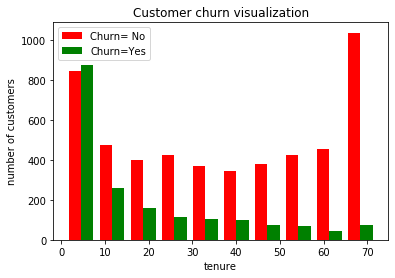

In [19]:
import matplotlib.pyplot as plt

plt.xlabel('tenure')
plt.ylabel('number of customers')
plt.title('Customer churn visualization')
plt.hist([tenure_churn_no,tenure_churn_yes],color=['red','green'], label=['Churn= No','Churn=Yes'])
plt.legend()

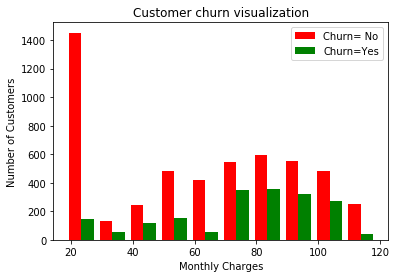

In [20]:
tenure_churn_no = df1[df1.Churn=='No'].MonthlyCharges
tenure_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges

plt.xlabel('Monthly Charges')
plt.ylabel('Number of Customers')
plt.title('Customer churn visualization')
plt.hist([tenure_churn_no,tenure_churn_yes],color=['red','green'], label=['Churn= No','Churn=Yes'])
plt.legend()


In [21]:
# Unique values in each column

def unique_col_values(df):
    for column in df1:
        if df1[column].dtype=='object':
            print(f'{column}: {df1[column].unique()}')

In [22]:
unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [23]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)


C:\Users\ACER\anaconda3\lib\site-packages\pandas\core\frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [24]:
unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [25]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity',
                  'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
                  'PaperlessBilling','PaperlessBilling','Churn']

In [26]:
for col in yes_no_columns:
    df1[col].replace({'Yes':1,'No':0},inplace=True)

C:\Users\ACER\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [27]:
# The above cell ran successfully so ignore the error and warning

In [28]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,No
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,No
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,Yes
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,Yes


In [29]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService      object
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [30]:
unique_col_values(df1)

gender: ['Female' 'Male']
InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [31]:
# Dummy encoding

df2 = pd.get_dummies(data=df1, columns=['gender','InternetService','Contract','PaymentMethod'])

In [32]:
df2.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,34,1,0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,2,1,0,1,1,0,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,45,0,0,1,0,1,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,2,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [33]:
df2.dtypes

SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                       object
gender_Female                                uint8
gender_Male                                  uint8
InternetService_DSL                          uint8
InternetService_Fiber optic    

In [34]:
df2.replace(to_replace=['Yes','No'], value= [1,0], inplace=True)

In [35]:
df2.dtypes

SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
gender_Female                                uint8
gender_Male                                  uint8
InternetService_DSL                          uint8
InternetService_Fiber optic    

In [36]:
# Scalimg features with high values

cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [37]:
df2.sample(3)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2760,0,0,0,0.352113,1,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
2049,0,1,0,0.957746,1,1,0,1,1,0,...,0,1,0,1,0,0,1,0,0,0
4846,0,0,0,0.084507,1,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0


In [38]:
df2.shape

(7032, 28)

In [39]:
# Splitting Features and target

X = df2.drop('Churn', axis=1)
print(X.shape)

Y = df2['Churn']
print(Y.shape)

(7032, 27)
(7032,)


In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=5)

print(f'X_train: {X_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'Y_train: {Y_train.shape}')
print(f'Y_test: {Y_test.shape}')

X_train: (5625, 27)
X_test: (1407, 27)
Y_train: (5625,)
Y_test: (1407,)


# Building the model


In [41]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    
    keras.layers.Dense(20, input_shape=(27,),activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
    ])

model.compile(optimizer='adam',loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=100)


Train on 5625 samples
Epoch 1/100
5625/5625 [==============================] - 0s 52us/sample - loss: 0.5275 - accuracy: 0.7531
Epoch 2/100
5625/5625 [==============================] - 0s 42us/sample - loss: 0.4372 - accuracy: 0.7964
Epoch 3/100
5625/5625 [==============================] - 0s 35us/sample - loss: 0.4243 - accuracy: 0.8027
Epoch 4/100
5625/5625 [==============================] - 0s 39us/sample - loss: 0.4187 - accuracy: 0.8036
Epoch 5/100
5625/5625 [==============================] - 0s 37us/sample - loss: 0.4152 - accuracy: 0.8076
Epoch 6/100
5625/5625 [==============================] - 0s 38us/sample - loss: 0.4141 - accuracy: 0.8084
Epoch 7/100
5625/5625 [==============================] - 0s 41us/sample - loss: 0.4119 - accuracy: 0.8092
Epoch 8/100
5625/5625 [==============================] - 0s 36us/sample - loss: 0.4110 - accuracy: 0.8084
Epoch 9/100
5625/5625 [==============================] - 0s 41us/sample - loss: 0.4095 - accuracy: 0.8096
Epoch 10/100
5625/5625 [

5625/5625 [==============================] - 0s 34us/sample - loss: 0.3858 - accuracy: 0.8192
Epoch 76/100
5625/5625 [==============================] - 0s 35us/sample - loss: 0.3860 - accuracy: 0.8167
Epoch 77/100
5625/5625 [==============================] - 0s 34us/sample - loss: 0.3850 - accuracy: 0.8178
Epoch 78/100
5625/5625 [==============================] - 0s 35us/sample - loss: 0.3848 - accuracy: 0.8199
Epoch 79/100
5625/5625 [==============================] - 0s 37us/sample - loss: 0.3853 - accuracy: 0.8185
Epoch 80/100
5625/5625 [==============================] - 0s 34us/sample - loss: 0.3846 - accuracy: 0.8201
Epoch 81/100
5625/5625 [==============================] - 0s 35us/sample - loss: 0.3854 - accuracy: 0.8178
Epoch 82/100
5625/5625 [==============================] - 0s 34us/sample - loss: 0.3848 - accuracy: 0.8194
Epoch 83/100
5625/5625 [==============================] - 0s 34us/sample - loss: 0.3828 - accuracy: 0.8208
Epoch 84/100
5625/5625 [==========================

In [42]:
model.evaluate(X_test, Y_test)

1407/1407 [==============================] - 0s 33us/sample - loss: 0.4477 - accuracy: 0.7918


[0.44765120740468906, 0.7917555]

In [43]:
yp = model.predict(X_test)
yp[:5]

array([[0.24755591],
       [0.33303294],
       [0.02982396],
       [0.78825414],
       [0.45621657]], dtype=float32)

In [45]:
yp.shape

(1407, 1)

In [44]:
Y_test[:5]

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int64

In [46]:
y_pred = []

for element in yp:
    if element > 0.5:
        y_pred.append(1)
9    else:
        y_pred.append(0)

In [47]:
y_pred[:5]

[0, 0, 0, 1, 0]

In [49]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       999
           1       0.68      0.54      0.60       408

    accuracy                           0.79      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.78      0.79      0.78      1407



Text(69.0, 0.5, 'True')

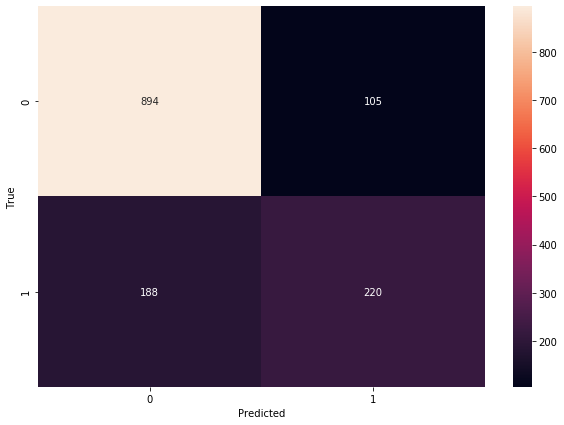

In [50]:
import seaborn as sns

cm= tf.math.confusion_matrix(labels= Y_test , predictions = y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')

In [53]:
from sklearn import metrics #precision_score, recall_score, accuracy_score, f1_score

metrics.precision_score(Y_test,y_pred)

0.676923076923077

In [54]:
metrics.recall_score(Y_test, y_pred)

0.5392156862745098

In [55]:
metrics.accuracy_score(Y_test,y_pred)

0.7917555081734187